<a href="https://colab.research.google.com/github/CeHaga/cnn-cats-dogs/blob/main/Cats_Dogs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador de Cães e Gatos

## Conexão com o GitHub

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/CeHaga/cnn-cats-dogs.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 37418 (delta 2), reused 5 (delta 1), pack-reused 37408
Receiving objects: 100% (37418/37418), 810.59 MiB | 37.13 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (38503/38503), done.
/content/cloned-repo
Cats_Dogs_Classifier.ipynb  dataset_treino	README.md
dataset_teste		    dataset_validation


## Importar bibliotecas e conferir versões

In [ ]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.3.0


In [ ]:
import keras as K
print("Versão do Keras:", K.__version__)

Versão do Keras: 2.4.3


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Configuração da Rede Neural

In [ ]:
classifier = Sequential()

### Camada 1: Convolução

In [ ]:
# Adiciona uma camada de convolução na rede
# Serão criados 32 mapas de características
# O filtro de leitura será de 3x3
# A entrada é uma imagem de 64x64px com 3 cores
# A função de ativação é ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

### Camada 2: Pooling

In [ ]:
# Adiciona uma camada de pooling na rede
# Tamanho de 2x2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Camada 3: Convolução

In [ ]:
# Adiciona outra camada de convolução
# 32 mapas de características
# Filtro 3x3
# Ativação ReLU
# (Dessa vez sem entrada pois não é a primeira camada)
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

### Camada 4: Pooling

In [ ]:
# Adiciona outra camada de pooling
# Também de tamanho 2x2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Camada 5: Achatamento

In [ ]:
# Adiciona uma camada de achatamento, para representar os dados em 2D como um vetor 1D
classifier.add(Flatten())

### Camada 6: Conexão Completa

In [ ]:
# Adiciona uma camada completamente conectada de 128 perceptrons
# A função de ativação é ReLU
classifier.add(Dense(units = 128, activation = 'relu'))

### Camada 7: Saída

In [ ]:
# Por fim, é adicionado um único Perceptron, para representar a saída
# Seu resultado será da função de ativação Sigmóide, representando a probabilidade de ser gato ou cachorro
classifier.add(Dense(units = 1, activation = 'sigmoid'))

### Compilação

In [ ]:
# Com a rede montada, basta compilar
# O método de treinamento é Adam, uma melhora do SGD
# A função de custo é Entropia Cruzada Binária, pois há apenas 2 categorias
# O atributo a ser comparado é a acurácia do modelo
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Pré-Processamento de Dados

In [ ]:
# As imagens de treino e validação são transformadas a partir
#  de alguns atributos para melhorar o treino
# Multiplica os valores por 1/255, assim os pixels estão entre 0 e 1
# As imagens são inclinadas até 20% pra esquerda ou até 20% pra direita aleatoriamente
# As imagens tem um zoom de até 20%
# Algumas imagens são invertidas horizontalmente

# As imagens de validação precisam ter a mesma mudança de valores como o de treino teve,
#  mas sem os atributos extras de alteração, pois não há a necessidade de gerar mais dados

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Prepara as imagens pra entrada na rede
# Define o tamanho delas 64x64
# O tamanho do mini-lote é de 32
# Modo binário (Cachorro ou Gato)
training_set = train_datagen.flow_from_directory('dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


## Treinamento

In [ ]:
# Começa o treinamento
# Cada época percorre toda mini-lote
# Treina por 5 épocas
# Faz 2000 passos na validação
classifier.fit(training_set,
                         steps_per_epoch = training_set.n // training_set.batch_size,
                         epochs = 5,
                         validation_data = validation_set,
                         validation_steps = validation_set.n // validation_set.batch_size)

Epoch 1/5
781/781 [==============================] - 190s 244ms/step - loss: 0.6128 - accuracy: 0.6635
Epoch 2/5
781/781 [==============================] - 188s 241ms/step - loss: 0.5249 - accuracy: 0.7395
Epoch 3/5
781/781 [==============================] - 188s 241ms/step - loss: 0.4819 - accuracy: 0.7694
Epoch 4/5
781/781 [==============================] - 190s 243ms/step - loss: 0.4496 - accuracy: 0.7902
Epoch 5/5
781/781 [==============================] - 187s 239ms/step - loss: 0.4300 - accuracy: 0.7983


## Resultado

In [ ]:
# Basta pegar uma imagem aleatória e o modelo será capaz de prever
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

def test():
  file = random.choice(os.listdir("dataset_teste"))
  file = "dataset_teste/"+file

  # Alterar o tamanho para 64x64
  test_image = image.load_img(file, target_size = (64, 64))
  # Converter em um array
  test_image = image.img_to_array(test_image)/255.
  # Coloca o array dentro de um array, para passar para a função
  test_image = np.expand_dims(test_image, axis = 0)
  result = classifier.predict(test_image)
  prob = result[0][0]

  if prob > 0.5:
      prediction = 'Cachorro'
  else:
      prediction = 'Gato'
      prob = 1 - prob;

  print(f'%.2f%% %s' % (prob*100, prediction))
  img = mpimg.imread(file)
  imgplot = plt.imshow(img)
  plt.axis('off')
  plt.show()

75.92% Gato


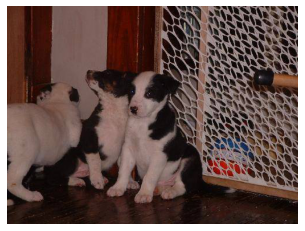

In [ ]:
test()

97.22% Gato


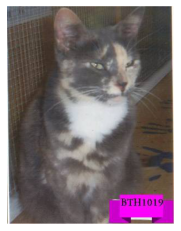

In [ ]:
test()

98.55% Cachorro


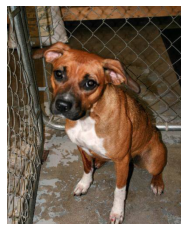

In [ ]:
test()

62.53% Cachorro


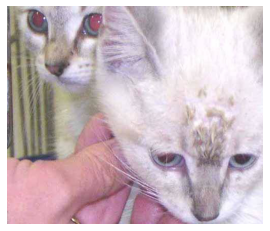

In [ ]:
test()

91.50% Cachorro


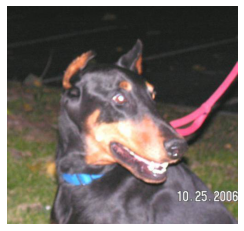

In [ ]:
test()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

def testImage(file):
  # Alterar o tamanho para 64x64
  test_image = image.load_img(file, target_size = (64, 64))
  # Converter em um array
  test_image = image.img_to_array(test_image)/255.
  # Coloca o array dentro de um array, para passar para a função
  test_image = np.expand_dims(test_image, axis = 0)
  result = classifier.predict(test_image)
  prob = result[0][0]

  if prob > 0.5:
      prediction = 'Cachorro'
  else:
      prediction = 'Gato'
      prob = 1 - prob;

  print(f'%.2f%% %s' % (prob*100, prediction))
  img = mpimg.imread(file)
  imgplot = plt.imshow(img)
  plt.axis('off')
  plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


78.86% Gato


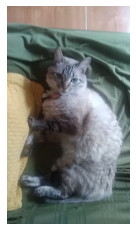

95.37% Gato


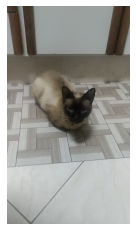

95.86% Cachorro


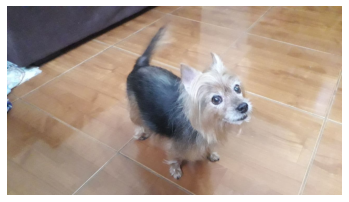

57.99% Gato


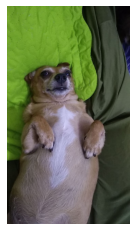

In [101]:
testImage('/content/drive/My Drive/Cats_Dogs_Classifier/Cat_1.jpg')
testImage('/content/drive/My Drive/Cats_Dogs_Classifier/Cat_2.jpg')
testImage('/content/drive/My Drive/Cats_Dogs_Classifier/Dog_1.jpg')
testImage('/content/drive/My Drive/Cats_Dogs_Classifier/Dog_2.jpg')

## Exportar Modelo

Biblioteca necessária para salvar o modelo inteiro

In [102]:
!pip install pyyaml h5py

In [103]:
# Salva o modelo inteiro dentro da pasta model
classifier.save('/content/drive/My Drive/Cats_Dogs_Classifier/model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Cats_Dogs_Classifier/model/assets
